In [69]:
#Xe131m generator Primary Particle position analysis
##   - include Phase boundary, cathode, skin region

In [70]:
#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")



Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [71]:
#filename_2 = "/home/rossiter/Xe131m_Generator/ReducedAnalysis/DaveTDR/ReducedAnalysisTree/NEWXe131m_1e7_20170814_reduced.root"
filename_2 = "/home/rossiter/BACCARAT/BACCARAT_200115/lz_xenon_RingbomXe131m_g4decay_1e5_1505947312_READER.root"#lz_xenon_RingbomXe131m_g4decay_1e2_38677576_READER.root"


In [72]:
def ReadDataFile_2(root_file):
    #list branches you want to retrive
    bg_analysis_RQs = ['fPrimaryParPosX_mm', 'fPrimaryParPosY_mm', 'fPrimaryParPosZ_mm']

    #Open the trees from the root file
    bg_analysis_Vertices=uproot.open(root_file)['tree']
    #bg_analysis_Vertices.show()

    #extract the branches in the list you want from those trees
    #it returns as dictionary with those variables in them
    bg_analysis_Vertices_data=bg_analysis_Vertices.arrays(bg_analysis_RQs)

    bg_analysis_fPrimaryParX_mm= bg_analysis_Vertices_data['fPrimaryParPosX_mm']
    bg_analysis_fPrimaryParY_mm= bg_analysis_Vertices_data['fPrimaryParPosY_mm']
    bg_analysis_fPrimaryParZ_mm= bg_analysis_Vertices_data['fPrimaryParPosZ_mm']

    bg_analysis_fPrimaryParR_cm = pow( pow(.1*bg_analysis_fPrimaryParX_mm,2) + pow(.1*bg_analysis_fPrimaryParY_mm,2) ,.5)
    bg_analysis_fPrimaryParZ_cm = .1*bg_analysis_fPrimaryParZ_mm
    
    return bg_analysis_fPrimaryParR_cm, bg_analysis_fPrimaryParZ_cm

print "reading file"
ALL_bg_analysis_fPrimaryParR_cm_temp_list, ALL_bg_analysis_fPrimaryParZ_cm_temp_list =  ReadDataFile_2(filename_2)    

print "\n"
print len(ALL_bg_analysis_fPrimaryParR_cm_temp_list)


print "\ncleaning lists"

ALL_fPrimaryParR_cm_list=[]
ALL_fPrimaryParZ_cm_list=[]
for i in range(0, len(ALL_bg_analysis_fPrimaryParR_cm_temp_list)):
    if len(ALL_bg_analysis_fPrimaryParR_cm_temp_list[i]) != 1:
        print len(ALL_bg_analysis_fPrimaryParR_cm_temp_list[i])
    else:
        ALL_fPrimaryParR_cm_list.append(ALL_bg_analysis_fPrimaryParR_cm_temp_list[i][0])
        ALL_fPrimaryParZ_cm_list.append(ALL_bg_analysis_fPrimaryParZ_cm_temp_list[i][0])

print "len(ALL_fPrimaryParR_cm_list): "+str(len(ALL_fPrimaryParR_cm_list))
print "len(ALL_fPrimaryParZ_cm_list): "+str(len(ALL_fPrimaryParZ_cm_list))

print("\n\t...Done!")

reading file


100021

cleaning lists
len(ALL_fPrimaryParR_cm_list): 100021
len(ALL_fPrimaryParZ_cm_list): 100021

	...Done!


100021
69.22448309128224
58.00459124907099
72.18142784569504
80.93582771465562
59.22834619928369
53.59079312088672
47.61921781581252
50.46504229796262
77.19158360108165
39.514596443237075
30.313742186702004
26.548349220387664
42.53533523112705
26.615468388866812
29.229563914308567
64.74835827175336
37.60184034544105
26.782891356668436
31.396472128592052
78.15262386284671


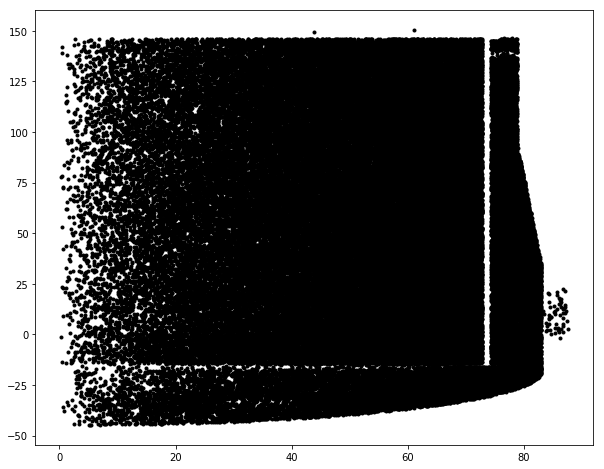

In [73]:
print len(ALL_fPrimaryParR_cm_list)
#print len(ALL_fPrimaryParR_cm_list[0])

for i in range(0, 20):
    print ALL_fPrimaryParR_cm_list[i]
figure(1)
plt.plot(ALL_fPrimaryParR_cm_list, ALL_fPrimaryParZ_cm_list, '.k')       


#plt.ylim(-18,-12)

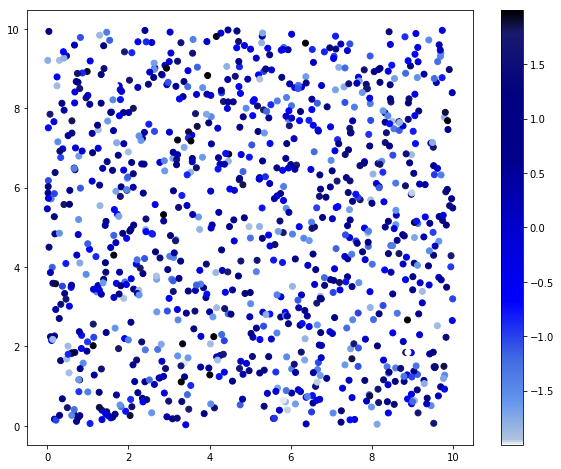

In [111]:
#Custom colormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
#rvb = make_colormap(
#    [c('white'), c('violet'), 0.33, c('violet'), c('blue'), 0.66, c('blue'), c('black')])

Peters = make_colormap(
    #[c('white'), c('red'), 0.5, c('red'), c('black')])
    #[c('white'), c('yellow'), 0.25, c('yellow'), c('orange'), 0.5, c('orange'), c('red'), 0.75, c('red'), c('black')])
    #[c('white'), c('salmon'), 0.3, c('salmon'), c('tomato'), 0.6, c('tomato'), c('red'), 0.9, c('red'), c('firebrick'), 0.95, c('firebrick'), c('black')])
    [c('white'), c('lightsteelblue'), 0.01, c('lightsteelblue'),  c('cornflowerblue'), 0.1, c('cornflowerblue'),c('royalblue'), 0.2, c('royalblue'), c('blue'), 0.33, c('blue'),  c('mediumblue'), 0.5, c('mediumblue'),  c('darkblue'), 0.66, c('darkblue'), c('navy'), 0.8, c('navy'), c('midnightblue'), 0.95, c('midnightblue'), c('black')])
#Test colormap
N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=Peters)
plt.colorbar()
plt.show()

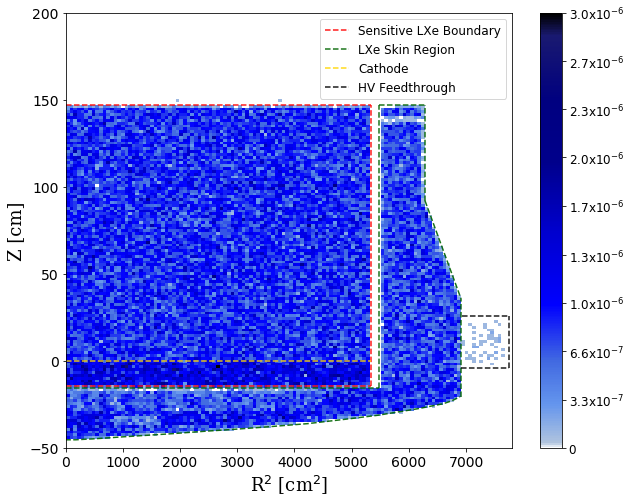

In [246]:
#plot R vs Z
num_bins=120#339#50


r = linspace(0, 68.8, 2)
z_fid = linspace(132.1, 132.1, 2)
z = linspace(0, 132.1, 2)
r_fid = linspace(68.8, 68.8, 2)

t=147.#146.55
b = -14.7
z_top = linspace(t, t, 2)
z_bot = linspace(b, b, 2)
z2 = linspace(b, t, 2)


r2 = linspace(0, 73.01, 2)
r_top = linspace(73.01, 73.01, 2)

RskinIN = 74.#74.5
RskinRT = 79.25#78.9
r_skinIN=linspace(RskinIN, RskinIN, 2)
skin_r2 = linspace(RskinIN, RskinRT,2)
r_skinOUT1=linspace(RskinRT, RskinRT, 2)

r_skin_bot=[-5.283259712, 115.3075755, 174.2007741, 387.3380643, 467.2645481, 1047.78322, 1855.791623, 2428.01544, 2893.238056, 3434.059346, 4233.660717, 4911.141151, 5454.870083, 6161.426931, 6594.665492, 6748.770483, 6891.244909]    
#z_skin_bot=[-44.27410538, -44.27688173, -44.20327613, -43.83337569, -43.76025434, -42.42431265, -40.73123857, -39.31436338, -38.31471314, -37.00592309, -34.92589012, -32.3767251, -30.13536105, -26.3433442, -23.55539579, -21.84910201, -19.52077983]     
z_skin_bot=np.asarray([-44.4, -44.4, -44.4, -44., -43.9, -42.6, -40.9, -39.5, -38.5, -37.2, -35.1, -32.5, -30.3, -26.5, -23.7, -22., -19.7])     

figure(1)
matplotlib.pyplot.hist2d(pow(np.asarray(ALL_fPrimaryParR_cm_list),2), ALL_fPrimaryParZ_cm_list, bins=num_bins, cmap=Peters, normed=True, label='$^{131m}$Xe generator primary particle')
plt.plot(pow(r2,2), z_top, '--', c='red', alpha=.9, label='Sensitive LXe Boundary')
plt.plot(pow(r2,2), z_bot, '--', c='red', alpha=.9)
plt.plot(pow(r_top,2), z2, '--', c='red', alpha=.9)



skin_col='darkgreen'
plt.plot(pow(r_skinIN,2), [-15.35,t], '--', c=skin_col, alpha=.9, label='LXe Skin Region')
plt.plot([0,pow(RskinIN,2)], [-15.35,-15.35], '--', c=skin_col, alpha=.9)
plt.plot(pow(skin_r2,2), z_top, '--', c=skin_col, alpha=.9)
plt.plot(pow(r_skinOUT1,2), [92.,t], '--', c=skin_col, alpha=.9)
plt.plot([pow(RskinRT,2), 6912.], [92.,35.5], '--', c=skin_col, alpha=.9)
plt.plot([6912.,6912.],[z_skin_bot[-1]-1., 35.5], '--', c=skin_col, alpha=.9)
plt.plot(r_skin_bot, z_skin_bot-1., '--', c=skin_col, alpha=.9)

plt.plot(pow(r2,2), [0,0], '--', c='gold', alpha=.9, label='Cathode')

plt.plot([6920., 7750], [26,26], '--k', alpha=.9, label='HV Feedthrough')
plt.plot([6915., 7750], [-4,-4], '--k', alpha=.9)
plt.plot([7750., 7750], [-4,26], '--k', alpha=.9)
#plt.plot([6920, 6920], [-4,26], '--k', alpha=.9)



#matplotlib.pyplot.hist2d(fLXeR_cm_list, fLXeZ_cm_list, 50, cmap=Peters)
#matplotlib.pyplot.hist2d(R_square, Z, 75, cmap=Peters)


plt.xlabel('R$^2$ [cm$^2$]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 7800)
plt.ylim(-50, 200)

#cb=plt.colorbar()
cb=plt.colorbar(ticks=[0, 3.31E-07, 6.62E-07, 9.93E-07, 1.32E-06, 1.66E-06, 1.99E-06, 2.32E-06, 2.65E-06, 2.98E-06])
cb.ax.set_yticklabels(['0', '3.3x10$^{-7}$', '6.6x10$^{-7}$', '1.0x10$^{-6}$', '1.3x10$^{-6}$', '1.7x10$^{-6}$', '2.0x10$^{-6}$', '2.3x10$^{-6}$', '2.7x10$^{-6}$', '3.0x10$^{-6}$'])

#cb=plt.colorbar(ticks=[9.62E-08, 5.0E-07, 1.0E-06, 1.5E-06, 2.01E-06, 2.5E-06, 2.97E-06])
#cb.ax.set_yticklabels(['1.0x10$^{-7}$',  '5.0x10$^{-7}$', '1.0x10$^{-6}$','1.5x10$^{-6}$',
#                       '2.0x10$^{-6}$', '2.5x10$^{-6}$', '3.0x10$^{-6}$']) 



cb.ax.tick_params(labelsize=12)



pylab.legend(loc='upper right', fontsize=12)

#plt.plot([6920., 7750], [26,26], '--k', alpha=.9, label='HV Feedthrough')
#plt.plot([6915., 7750], [-4,-4], '--k', alpha=.9)
#plt.plot([7750., 7750], [-4,26], '--k', alpha=.9)
##plt.plot([6920, 6920], [-4,26], '--k', alpha=.9)


plt.savefig('deleteme.png')

# -Play space


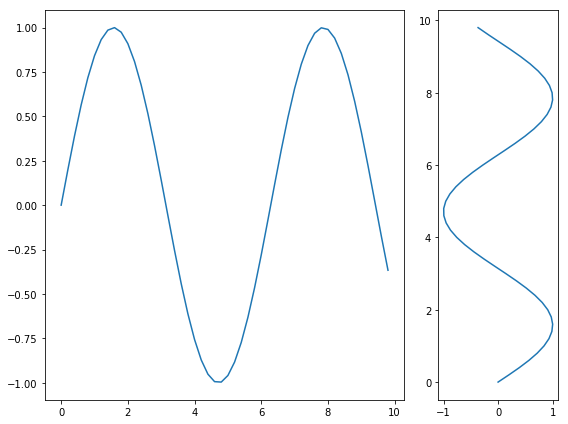

In [252]:
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)
ax1 = plt.subplot(gs[1])
ax1.plot(y, x)

plt.tight_layout()

Text(0,0.5,'Marginal y label')

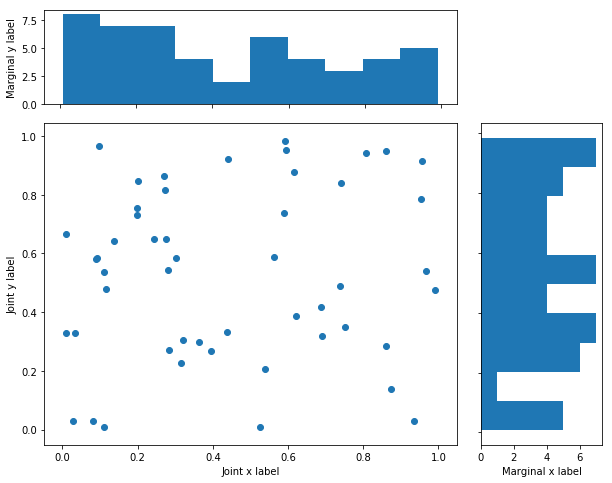

In [253]:
x = np.random.rand(50)
y = np.random.rand(50)

fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y)
ax_marg_x.hist(x)
ax_marg_y.hist(y,orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')

# Set labels on marginals
ax_marg_y.set_xlabel('Marginal x label')
ax_marg_x.set_ylabel('Marginal y label')